# 5. `numpy`, `scipy` and `pandas` modules

## 5.1. `numpy`
http://www.numpy.org/


NumPy is Python module for scientific computations. It specializes in multi-dimensional data arrays processing and linear algebra. It includes:

* n-dimensional arrays (numpy.ndarray) with specifiable types (numpy.dtype)
* universal vectorized functions
* Discrete Fourier Transform (numpy.fft)
* linear algebra
* utilites for reading and writing data files
* and much more, see [official documentation](https://docs.scipy.org/doc/numpy/reference/)

Installation:

    conda install numpy
    apt-get install python3-numpy
    pip install numpy
    
Import:

```python
import numpy
```

### 5.1.1 N-dimensional arrays

#### 5.1.1.1 Basic Usage

In [1]:
import numpy

a = numpy.array([1, 2, 3, 4, 5, 6, 7, 8])

print(a, type(a), a[1], sep='\n')

[1 2 3 4 5 6 7 8]
<class 'numpy.ndarray'>
2


In [2]:
a.reshape(2, 4)

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

In case reshape tries to change initial array size you will get an error

    ValueError: total size of new array must be unchanged

In [3]:
a = a.reshape(2, 2, 2)
print(a)

[[[1 2]
  [3 4]]

 [[5 6]
  [7 8]]]


In [4]:
a[1, 1, 0] = 100.7
print(a) # NB: 100.7 is rounded up to 100

[[[  1   2]
  [  3   4]]

 [[  5   6]
  [100   8]]]


In [5]:
a = numpy.array([1, 2, 3, 4, 5, 6, 7, 8], numpy.float).reshape(2, 2, 2)
a[1, 1, 0] = 100.7
print(a) # NB: 100.7 is rounded up to 100

[[[   1.     2. ]
  [   3.     4. ]]

 [[   5.     6. ]
  [ 100.7    8. ]]]


In [6]:
for z in a:
    print(z)

[[ 1.  2.]
 [ 3.  4.]]
[[   5.     6. ]
 [ 100.7    8. ]]


Serialized array as a string by dumps:

In [7]:
print(a.dumps())

b'\x80\x02cnumpy.core.multiarray\n_reconstruct\nq\x00cnumpy\nndarray\nq\x01K\x00\x85q\x02c_codecs\nencode\nq\x03X\x01\x00\x00\x00bq\x04X\x06\x00\x00\x00latin1q\x05\x86q\x06Rq\x07\x87q\x08Rq\t(K\x01K\x02K\x02K\x02\x87q\ncnumpy\ndtype\nq\x0bX\x02\x00\x00\x00f8q\x0cK\x00K\x01\x87q\rRq\x0e(K\x03X\x01\x00\x00\x00<q\x0fNNNJ\xff\xff\xff\xffJ\xff\xff\xff\xffK\x00tq\x10b\x89h\x03XF\x00\x00\x00\x00\x00\x00\x00\x00\x00\xc3\xb0?\x00\x00\x00\x00\x00\x00\x00@\x00\x00\x00\x00\x00\x00\x08@\x00\x00\x00\x00\x00\x00\x10@\x00\x00\x00\x00\x00\x00\x14@\x00\x00\x00\x00\x00\x00\x18@\xc3\x8d\xc3\x8c\xc3\x8c\xc3\x8c\xc3\x8c,Y@\x00\x00\x00\x00\x00\x00 @q\x11h\x05\x86q\x12Rq\x13tq\x14b.'


Copy just copies pointer, as for lists. So use `copy`:

In [8]:
b = a
b[0, 0, 0] = 9
print(a)

[[[   9.     2. ]
  [   3.     4. ]]

 [[   5.     6. ]
  [ 100.7    8. ]]]


In [9]:
b = a.copy()
b[0, 0, 0] = 1000
print(a)

[[[   9.     2. ]
  [   3.     4. ]]

 [[   5.     6. ]
  [ 100.7    8. ]]]


Get a new a flattened array:

In [10]:
print(a.ravel())

[   9.     2.     3.     4.     5.     6.   100.7    8. ]


In [11]:
print(len(a), a.size, a.shape)

2 8 (2, 2, 2)


In [12]:
print(a.sum(0), a.sum(1), a.sum(2), sep='\n\n')

[[  14.     8. ]
 [ 103.7   12. ]]

[[  12.     6. ]
 [ 105.7   14. ]]

[[  11.     7. ]
 [  11.   108.7]]


In [13]:
print(a.clip(0, 10))

[[[  9.   2.]
  [  3.   4.]]

 [[  5.   6.]
  [ 10.   8.]]]


In [14]:
print(a.flatten())
print(a.reshape(-1))
print(a)

[   9.     2.     3.     4.     5.     6.   100.7    8. ]
[   9.     2.     3.     4.     5.     6.   100.7    8. ]
[[[   9.     2. ]
  [   3.     4. ]]

 [[   5.     6. ]
  [ 100.7    8. ]]]


In [15]:
print(a.flatten(order='C'))

[   9.     2.     3.     4.     5.     6.   100.7    8. ]


In [16]:
print(a.flatten(order='F'))

[   9.     5.     3.   100.7    2.     6.     4.     8. ]


In [17]:
print(a.sum())

137.7


In [18]:
print(sum(a))
print(numpy.sum(a))

[[  14.     8. ]
 [ 103.7   12. ]]
137.7


#### 5.1.1.2 Operations with ndarrays

In [19]:
import numpy as np
A = 3 / np.ones([4, 4])
B = 3 * np.eye(4)
print("A:\n", A)
print("B:\n", B)

A:
 [[ 3.  3.  3.  3.]
 [ 3.  3.  3.  3.]
 [ 3.  3.  3.  3.]
 [ 3.  3.  3.  3.]]
B:
 [[ 3.  0.  0.  0.]
 [ 0.  3.  0.  0.]
 [ 0.  0.  3.  0.]
 [ 0.  0.  0.  3.]]


In [20]:
C = A + B
print(C)

[[ 6.  3.  3.  3.]
 [ 3.  6.  3.  3.]
 [ 3.  3.  6.  3.]
 [ 3.  3.  3.  6.]]


In [21]:
C = A * B
print(C)

[[ 9.  0.  0.  0.]
 [ 0.  9.  0.  0.]
 [ 0.  0.  9.  0.]
 [ 0.  0.  0.  9.]]


In [22]:
C = A.dot(B)
print(C)

[[ 9.  9.  9.  9.]
 [ 9.  9.  9.  9.]
 [ 9.  9.  9.  9.]
 [ 9.  9.  9.  9.]]


`@` is equivalent to .dot:

In [23]:
C = A @ B # доступна с Python 3.5
print(C)

[[ 9.  9.  9.  9.]
 [ 9.  9.  9.  9.]
 [ 9.  9.  9.  9.]
 [ 9.  9.  9.  9.]]


### 5.1.2 Matrixes

A [matrix](https://docs.scipy.org/doc/numpy/reference/generated/numpy.matrix.html#numpy.matrix) is a specialized 2-D array that retains its 2-D nature through operations.

It has certain special operators, such as `*` (matrix multiplication) and `**` (matrix power).

In [24]:
D = np.matrix([[1, 2, 3], [5, 5, 6], [8, 8, 9]])
print(D, '\n')

[[1 2 3]
 [5 5 6]
 [8 8 9]] 



In [25]:
C = D * D
print(C)

[[ 35  36  42]
 [ 78  83  99]
 [120 128 153]]


In [26]:
C = np.array(D) * np.array(D)
print(C)

[[ 1  4  9]
 [25 25 36]
 [64 64 81]]


In [27]:
C = D.transpose()
print(C)

[[1 5 8]
 [2 5 8]
 [3 6 9]]


In [28]:
C = D ** -1
print(C)
print(C * D)

[[-1.          2.         -1.        ]
 [ 1.         -5.          3.        ]
 [ 0.          2.66666667 -1.66666667]]
[[  1.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   1.00000000e+00   0.00000000e+00]
 [ -1.77635684e-15  -1.77635684e-15   1.00000000e+00]]


In [29]:
E = np.matrix(complex(2, 3) * np.ones((3, 3)))

print(E.A, '\n') # Return self as an ndarray object.
print(E.A1, '\n') # Return self as a flattened ndarray.
print(E.H, '\n') # Returns the (complex) conjugate transpose of self.
print(E.real, '\n + i * \n', E.imag, '\n') # The real and imaginary parts of the array.

[[ 2.+3.j  2.+3.j  2.+3.j]
 [ 2.+3.j  2.+3.j  2.+3.j]
 [ 2.+3.j  2.+3.j  2.+3.j]] 

[ 2.+3.j  2.+3.j  2.+3.j  2.+3.j  2.+3.j  2.+3.j  2.+3.j  2.+3.j  2.+3.j] 

[[ 2.-3.j  2.-3.j  2.-3.j]
 [ 2.-3.j  2.-3.j  2.-3.j]
 [ 2.-3.j  2.-3.j  2.-3.j]] 

[[ 2.  2.  2.]
 [ 2.  2.  2.]
 [ 2.  2.  2.]] 
 + i * 
 [[ 3.  3.  3.]
 [ 3.  3.  3.]
 [ 3.  3.  3.]] 



In [30]:
np.linalg.det(np.eye(70))

1.0

In [31]:
A = np.matrix([[1, 0, 3], [4, 7, 9], [1, 2, 3]])
B = np.linalg.inv(A)
C = B * A
print(C.round(1))

[[ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]


### 5.1.3. Matrix functions

In [32]:
x = 6.28 * np.arange(100) / 100
np.sin(x)

array([ 0.        ,  0.06275873,  0.12527003,  0.18728745,  0.24856648,
        0.30886552,  0.36794685,  0.42557753,  0.48153035,  0.53558472,
        0.58752753,  0.63715398,  0.68426842,  0.7286851 ,  0.77022891,
        0.80873606,  0.84405473,  0.87604568,  0.90458278,  0.92955352,
        0.95085946,  0.96841659,  0.9821557 ,  0.99202261,  0.99797844,
        0.99999968,  0.99807839,  0.99222213,  0.98245398,  0.96881247,
        0.95135138,  0.93013954,  0.90526058,  0.87681259,  0.84490773,
        0.80967179,  0.77124368,  0.7297749 ,  0.68542896,  0.63838068,
        0.58881556,  0.53692901,  0.48292559,  0.42701822,  0.36942731,
        0.31037991,  0.25010883,  0.18885168,  0.12684998,  0.06434816,
        0.00159265, -0.06116914, -0.12368976, -0.18572274, -0.24702349,
       -0.30735035, -0.36646546, -0.42413576, -0.4801339 , -0.53423908,
       -0.586238  , -0.63592565, -0.68310614, -0.72759345, -0.76921219,
       -0.80779828, -0.84319959, -0.87527655, -0.90390269, -0.92

* **sin**, **cos**, **tan**, **arcsin** и др.
* **sinh**, **cosh**, **tanh** и др.
* **around**, **round**, **floor**, **ceil** и др.
* **prod**, **cumsum**, **sum** и др.
* **exp**, **log10**, **log** и др.
* etc: http://docs.scipy.org/doc/numpy/reference/routines.math.html

In [33]:
np.ceil([0.5, 3.5, 4.5, 7.5])

array([ 1.,  4.,  5.,  8.])

In [34]:
np.prod([1, 2, 3, 10])

60

In [35]:
np.sum([1, 2, 3, 10])

16

Vectorization allows to turn ordinary function into universal one: https://docs.scipy.org/doc/numpy/reference/generated/numpy.vectorize.html

In [36]:
def Changer(a, b):
    return a * 100 + (a + 15) % b

VectorizedChanger = np.vectorize(Changer, doc='Vectorized version of the Changer function.')

print(D)
VectorizedChanger(D, 13)

[[1 2 3]
 [5 5 6]
 [8 8 9]]


matrix([[103, 204, 305],
        [507, 507, 608],
        [810, 810, 911]])

In [37]:
@np.vectorize
def Changer(a, b):
    return a * 100 + (a + 15) % b

print(D)
Changer(D, 13)

[[1 2 3]
 [5 5 6]
 [8 8 9]]


matrix([[103, 204, 305],
        [507, 507, 608],
        [810, 810, 911]])

### 5.1.4. Random arrays

Full list: http://docs.scipy.org/doc/numpy/reference/routines.random.html

In [38]:
np.random.randint(30,  size=50)

array([28,  1, 17, 23, 23, 15,  3,  9,  8, 10,  3, 25, 15, 11, 15, 23, 16,
        3, 21, 10, 20,  7,  6,  4, 26, 12,  6, 12, 16, 15, 25, 27, 26, 18,
       13, 29, 29, 15, 16,  8, 29,  2,  4,  0, 20, 21, 29, 24, 27,  5])

In [39]:
np.random.randint(low=50, high=100, size=(3, 7))

array([[97, 78, 97, 82, 81, 85, 52],
       [95, 94, 80, 67, 95, 56, 85],
       [79, 55, 67, 74, 59, 70, 68]])

In [40]:
np.random.randn(3, 2, 3)

array([[[-0.26575378, -1.64883062,  0.7542978 ],
        [-0.52853437, -0.87508266, -2.02801992]],

       [[ 0.31204073,  0.47847454,  0.05785728],
        [-1.43619521, -0.06079711, -0.10932329]],

       [[-0.50753736, -0.72825022,  2.21070129],
        [-1.20329968, -1.09037748,  0.62996892]]])

In [41]:
a = np.arange(100)
for i in range(3):
    np.random.shuffle(a)
    print(a, '\n')

[57 37 25 53 89 94 24 72 80 76 78 69 87 23  8 44 93 34 18 38 61 90 55 12 97
 68 85 54 45 98  3 64 17  5 26 74 48 39 31  4 79 75 33 95 83 30 32 11 20 52
 27 86 70 16 73 10 92 56 58 15 36 77  0 28 60 88 35 46 62 50 66 63 29  1 99
 71  7 96 43  6 59 13  2 81 41 47 84 49 91 21 40 19 51 67 65 14 22 42  9 82] 

[43 26 41 11 70 15  0 64 44 62  2 97 80 65 30 91 21 10 87 78  5 63 32 17 53
 33  1 92 95 69 29 31 86 34 90 68 75 36 28 48 23 79 58 39 56 71 42 84 81 82
 49 96 88 67 52 24  9 61 45 55 16 72 14 13 98 12 94 89 77 74 60 40 47 51  3
 37 50 99 76 57 25 27 35 85  7 59 20  4 22 54 46 66 18 93  8 73 83 19 38  6] 

[68 33 39 16 44 23 52 17 95 22 28 87  9 29 10 49 62 86 82 84 96  6 25 79 83
 42 98 61 38 59  0 36 80 72 46 31 85 74 81 75  3 27 13 76 30 89 45 40 48  5
 77 43 53 51 35 93 73  4 65  7 55 88 64 91 97  1 58 66 70 20 54 94 14 47 12
 24 60 78 37 71 56 67 32 41 92 50 15 63  2 57 11 99 69 90 19  8 21 34 26 18] 



### 5.1.5. Various stats

In [42]:
a = np.random.randn(1000000)
print("mean", np.mean(a))
print("median", np.median(a))
print("std", np.std(a))
print("amin", np.amin(a))
print("amax", np.amax(a))

mean 0.000720288746007
median 0.000595599729284
std 1.0005996759
amin -4.71670267904
amax 4.88081760421


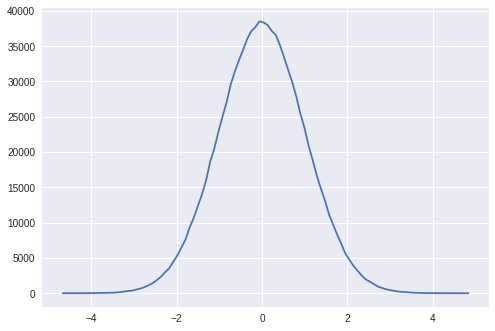

In [43]:
y, x = np.histogram(a, bins=100)
x = [0.5 * (x[i] + x[i + 1]) for i in range(len(y))]


%matplotlib inline
import matplotlib, seaborn
_ = matplotlib.pyplot.plot(x, y)

### 5.1.6. Input and output

In [44]:
a = np.random.randn(1000)
np.savetxt('data.txt', a)

Plain text files:

In [45]:
%%bash
head data.txt

1.412723375407655801e+00
-1.555315486978223971e+00
1.433293023782242992e+00
9.821114423528256587e-01
8.632770307288021305e-01
-1.399805306067900545e-01
-3.866888386068170758e-01
-1.765261198308109847e-01
1.505199620428478102e+00
-7.032950302748057492e-02


In [46]:
b = np.loadtxt('data.txt')
print(b[:5])

[ 1.41272338 -1.55531549  1.43329302  0.98211144  0.86327703]


Binary files:

In [47]:
np.savez_compressed('data.npz', a)

In [48]:
%%bash
ls -lh data.{npz,txt}

-rw-rw-r-- 1 bikulov bikulov 7,8K марта 17 13:06 data.npz
-rw-rw-r-- 1 bikulov bikulov  25K марта 17 13:06 data.txt


In [49]:
b = np.load('data.npz')['arr_0']
print(b[:5])

[ 1.41272338 -1.55531549  1.43329302  0.98211144  0.86327703]


## 5.2. scipy

scipy is set of mathematical algorithm, built on top of numpy. It contains several parts:

* **constants**: mathematical and physical constants
* **cluster**: clustering algorithms
* **interpolate**: interpolation and smoothing
* **io**: input/output helpers (MATLAB files, wav sound files, [etc](https://docs.scipy.org/doc/scipy/reference/tutorial/io.html))
* and more: http://docs.scipy.org/doc/scipy/reference/tutorial/general.html#scipy-organization

In [50]:
from scipy import constants
print("All constants:",  ", ".join(sorted([c for c in dir(constants) if not c.startswith('__')])))

All constants: Avogadro, Boltzmann, Btu, Btu_IT, Btu_th, C2F, C2K, ConstantWarning, F2C, F2K, G, Julian_year, K2C, K2F, N_A, Planck, R, Rydberg, Stefan_Boltzmann, Tester, Wien, _obsolete_constants, absolute_import, acre, alpha, angstrom, arcmin, arcminute, arcsec, arcsecond, astronomical_unit, atm, atmosphere, atomic_mass, atto, au, bar, barrel, bbl, c, calorie, calorie_IT, calorie_th, carat, centi, codata, constants, convert_temperature, day, deci, degree, degree_Fahrenheit, deka, division, dyn, dyne, e, eV, electron_mass, electron_volt, elementary_charge, epsilon_0, erg, exa, exbi, femto, fermi, find, fine_structure, fluid_ounce, fluid_ounce_US, fluid_ounce_imp, foot, g, gallon, gallon_US, gallon_imp, gas_constant, gibi, giga, golden, golden_ratio, grain, gram, gravitational_constant, h, hbar, hectare, hecto, horsepower, hour, hp, inch, k, kgf, kibi, kilo, kilogram_force, kmh, knot, lambda2nu, lb, lbf, light_year, liter, litre, long_ton, m_e, m_n, m_p, m_u, mach, mebi, mega, metric_t

In [51]:
print('g', constants.g)
print('barrel', constants.barrel)
print('acre', constants.acre)

g 9.80665
barrel 0.15898729492799998
acre 4046.8564223999992


### 5.2.1. cluster

Original: https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/

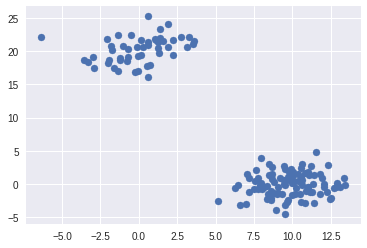

In [52]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
X = np.concatenate((a, b))
_ = plt.scatter(X[:,0], X[:,1])

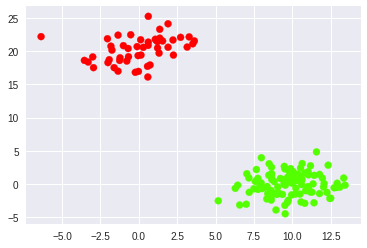

In [53]:
from scipy.cluster.hierarchy import fcluster, linkage
Z = linkage(X, 'ward')
clusters = fcluster(Z, 8, depth=10)
_ = plt.scatter(X[:,0], X[:,1], c=clusters, cmap='prism')

### 5.2.2. interpolate

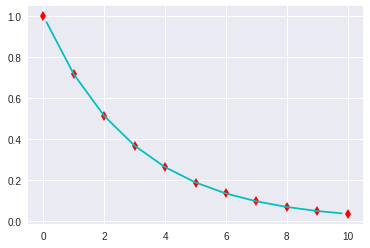

In [54]:
import matplotlib.pyplot as plt
from scipy import interpolate

x = np.arange(0, 11, 1)
y = np.exp(-x / 3.0)
f = interpolate.interp1d(x, y)

xnew = np.arange(0.1, 9.9, 0.1)
ynew = f(xnew)
plt.plot(x, y, 'rd', xnew, ynew, 'c-')
plt.show()

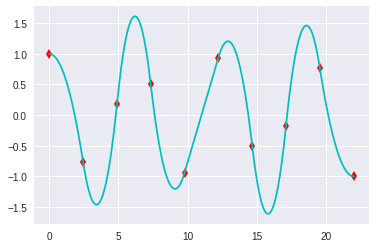

In [55]:
import numpy as np
from scipy import interpolate

x = np.linspace(0, 7 * np.pi, 10)
y = np.cos(x)

fq = interpolate.interp1d(x, y, kind='quadratic')
xnew = np.linspace(x[0], x[-1], 200)
ynew = fq(xnew)

plt.plot(x, y, 'rd', xnew, ynew, 'c')
plt.show()

## 5.3 pandas

Module for data manipulation and analysis. Doc: http://pandas.pydata.org/pandas-docs/stable/io.html

In [7]:
%%writefile data.csv
Name,Nx,Ny,Nz,Res (mcm),Lab porosity,Mean perm (mD)
A1,300,300,300,3.85,0.429,7220
Berea,400,400,400,5.345,0.196,1286
C1,400,400,400,2.85,0.233,1102
C2,400,400,400,5.345,0.168,72.333
F42A,450,450,450,9.996,0.33,59000
F42B,450,450,450,10.002,0.333,52300
F42C,450,450,450,10.002,0.331,50400
S1,300,300,300,8.683,0.141,1678
S2,300,300,300,4.956,0.246,3898
S3,300,300,300,9.1,0.169,224

Overwriting data.csv


In [8]:
import pandas as pd
df = pd.read_csv("data.csv")
df

,Name,Nx,Ny,Nz,Res (mcm),Lab porosity,Mean perm (mD)
0,A1,300,300,300,3.850,0.429,7220.000
1,Berea,400,400,400,5.345,0.196,1286.000
2,C1,400,400,400,2.850,0.233,1102.000
3,C2,400,400,400,5.345,0.168,72.333
4,F42A,450,450,450,9.996,0.330,59000.000
5,F42B,450,450,450,10.002,0.333,52300.000
6,F42C,450,450,450,10.002,0.331,50400.000
7,S1,300,300,300,8.683,0.141,1678.000
8,S2,300,300,300,4.956,0.246,3898.000
9,S3,300,300,300,9.100,0.169,224.000


In [9]:
df[df.Name == 'F42A']

,Name,Nx,Ny,Nz,Res (mcm),Lab porosity,Mean perm (mD)
4,F42A,450,450,450,9.996,0.33,59000.0


In [13]:
df.set_value(4, 'Name', 'Named')

,Name,Nx,Ny,Nz,Res (mcm),Lab porosity,Mean perm (mD)
0,A1,300,300,300,3.850,0.429,7220.000
1,Berea,400,400,400,5.345,0.196,1286.000
2,C1,400,400,400,2.850,0.233,1102.000
3,C2,400,400,400,5.345,0.168,72.333
4,Named,450,450,450,9.996,0.330,59000.000
5,F42B,450,450,450,10.002,0.333,52300.000
6,F42C,450,450,450,10.002,0.331,50400.000
7,S1,300,300,300,8.683,0.141,1678.000
8,S2,300,300,300,4.956,0.246,3898.000
9,S3,300,300,300,9.100,0.169,224.000


In [59]:
df.values

array([['A1', 300, 300, 300, 3.85, 0.429, 7220.0],
       ['Berea', 400, 400, 400, 5.345, 0.196, 1286.0],
       ['C1', 400, 400, 400, 2.85, 0.233, 1102.0],
       ['C2', 400, 400, 400, 5.345, 0.168, 72.333],
       ['F42A', 450, 450, 450, 9.996, 0.33, 59000.0],
       ['F42B', 450, 450, 450, 10.002, 0.33299999999999996, 52300.0],
       ['F42C', 450, 450, 450, 10.002, 0.331, 50400.0],
       ['S1', 300, 300, 300, 8.683, 0.141, 1678.0],
       ['S2', 300, 300, 300, 4.956, 0.24600000000000002, 3898.0],
       ['S3', 300, 300, 300, 9.1, 0.16899999999999998, 224.0]], dtype=object)

In [60]:
df.describe()

,Nx,Ny,Nz,Res (mcm),Lab porosity,Mean perm (mD)
count,10.00000,10.00000,10.00000,10.000000,10.000000,10.000000
mean,375.00000,375.00000,375.00000,7.012900,0.257600,17718.033300
std,67.70032,67.70032,67.70032,2.809544,0.094104,25144.526809
min,300.00000,300.00000,300.00000,2.850000,0.141000,72.333000
25%,300.00000,300.00000,300.00000,5.053250,0.175750,1148.000000
50%,400.00000,400.00000,400.00000,7.014000,0.239500,2788.000000
75%,437.50000,437.50000,437.50000,9.772000,0.330750,39605.000000
max,450.00000,450.00000,450.00000,10.002000,0.429000,59000.000000


In [61]:
df.sort_values(by="Res (mcm)").head()

,Name,Nx,Ny,Nz,Res (mcm),Lab porosity,Mean perm (mD)
2,C1,400,400,400,2.850,0.233,1102.000
0,A1,300,300,300,3.850,0.429,7220.000
8,S2,300,300,300,4.956,0.246,3898.000
1,Berea,400,400,400,5.345,0.196,1286.000
3,C2,400,400,400,5.345,0.168,72.333


In [62]:
df[['Name', 'Mean perm (mD)']][df.Name == 'A1']

,Name,Mean perm (mD)
0,A1,7220.0


In [63]:
df[['Name', 'Mean perm (mD)']][df['Mean perm (mD)'] > 1000]

,Name,Mean perm (mD)
0,A1,7220.0
1,Berea,1286.0
2,C1,1102.0
4,F42A,59000.0
5,F42B,52300.0
6,F42C,50400.0
7,S1,1678.0
8,S2,3898.0


In [64]:
df.iloc[0:3, 0:4]

,Name,Nx,Ny,Nz
0,A1,300,300,300
1,Berea,400,400,400
2,C1,400,400,400


In [65]:
df.insert(1, 'Column', [3] * len(df))
df

,Name,Column,Nx,Ny,Nz,Res (mcm),Lab porosity,Mean perm (mD)
0,A1,3,300,300,300,3.850,0.429,7220.000
1,Berea,3,400,400,400,5.345,0.196,1286.000
2,C1,3,400,400,400,2.850,0.233,1102.000
3,C2,3,400,400,400,5.345,0.168,72.333
4,F42A,3,450,450,450,9.996,0.330,59000.000
5,F42B,3,450,450,450,10.002,0.333,52300.000
6,F42C,3,450,450,450,10.002,0.331,50400.000
7,S1,3,300,300,300,8.683,0.141,1678.000
8,S2,3,300,300,300,4.956,0.246,3898.000
9,S3,3,300,300,300,9.100,0.169,224.000


In [66]:
df = df.drop('Column', 1)
df

,Name,Nx,Ny,Nz,Res (mcm),Lab porosity,Mean perm (mD)
0,A1,300,300,300,3.850,0.429,7220.000
1,Berea,400,400,400,5.345,0.196,1286.000
2,C1,400,400,400,2.850,0.233,1102.000
3,C2,400,400,400,5.345,0.168,72.333
4,F42A,450,450,450,9.996,0.330,59000.000
5,F42B,450,450,450,10.002,0.333,52300.000
6,F42C,450,450,450,10.002,0.331,50400.000
7,S1,300,300,300,8.683,0.141,1678.000
8,S2,300,300,300,4.956,0.246,3898.000
9,S3,300,300,300,9.100,0.169,224.000


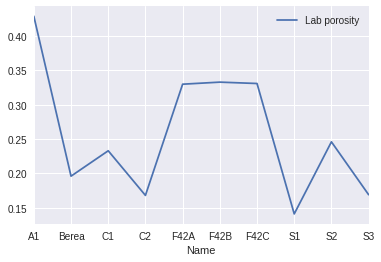

In [67]:
import matplotlib, seaborn
df.plot(x='Name', y='Lab porosity', )

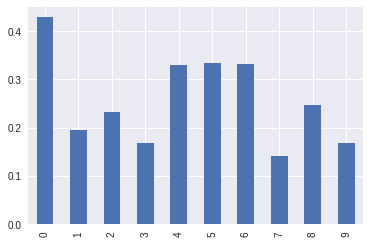

In [68]:
df['Lab porosity'].plot.bar()

More about visualization: http://pandas.pydata.org/pandas-docs/stable/visualization.html